In [245]:
import warnings
warnings.simplefilter("ignore")

# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf
from scipy.special import expit, logit

In [246]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [247]:
file_bekerja = r'/Users/fredy/Documents/Documents - MBP15-2-A1989/data.jabarprov.go.id/disnakertrans-od_15788_jumlah_penduduk_yang_bekerja_berdasarkan_golongan_umur_data.xlsx'
df_bekerja = pd.read_excel(file_bekerja)
#print(df_bekerja['jumlah_penduduk'])
df_bekerja.info()
df_bekerja.describe()
df_bekerja.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               120 non-null    int64 
 1   kode_provinsi    120 non-null    int64 
 2   nama_provinsi    120 non-null    object
 3   golongan_umur    120 non-null    object
 4   jumlah_penduduk  120 non-null    int64 
 5   satuan           120 non-null    object
 6   tahun            120 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 6.7+ KB


,id,kode_provinsi,nama_provinsi,golongan_umur,jumlah_penduduk,satuan,tahun
0,1,32,JAWA BARAT,15-19,872517,ORANG,2011
1,2,32,JAWA BARAT,20-24,1725911,ORANG,2011
2,3,32,JAWA BARAT,25-29,2351693,ORANG,2011
3,4,32,JAWA BARAT,30-34,2603263,ORANG,2011
4,5,32,JAWA BARAT,35-39,2441435,ORANG,2011


In [248]:
file_pengangguran = r'/Users/fredy/Documents/Documents - MBP15-2-A1989/data.jabarprov.go.id/disnakertrans-od_15805_jumlah_pengangguran_terbuka_berdasarkan_golongan_umur_data.xlsx'
df_pengangguran = pd.read_excel(file_pengangguran)
#print(df_pengangguran['jumlah_pengangguran_terbuka'])
df_pengangguran.info()
df_pengangguran.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           120 non-null    int64 
 1   kode_provinsi                120 non-null    int64 
 2   nama_provinsi                120 non-null    object
 3   golongan_umur                120 non-null    object
 4   jumlah_pengangguran_terbuka  120 non-null    int64 
 5   satuan                       120 non-null    object
 6   tahun                        120 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 6.7+ KB


,id,kode_provinsi,jumlah_pengangguran_terbuka,tahun
count,120.000000,120.0,120.000000,120.000000
mean,60.500000,32.0,182254.633333,2016.500000
std,34.785054,0.0,202540.026555,3.466527
min,1.000000,32.0,1324.000000,2011.000000
25%,30.750000,32.0,52473.750000,2013.750000
50%,60.500000,32.0,83109.000000,2016.500000
75%,90.250000,32.0,235800.000000,2019.250000
max,120.000000,32.0,721517.000000,2022.000000


In [249]:
file_pendidikan = r'/Users/fredy/Documents/Documents - MBP15-2-A1989/data.jabarprov.go.id/disnakertrans-od_15775_jumlah_angkatan_kerja_berdasarkan_tingkat_pendidikan_data.xlsx'
df_pendidikan = pd.read_excel(file_pendidikan)
#print(df_pengangguran['jumlah_pengangguran_terbuka'])
#df_pendidikan.info()
#df_pendidikan.describe()
df_pendidikan=df_pendidikan.groupby(['pendidikan','tahun'],as_index=False).sum()
df_pendidikan

,pendidikan,tahun,id,kode_provinsi,jumlah_angkatan_kerja
0,DIPLOMA I/II/III/AKADEMI,2011,5,32,560224
1,DIPLOMA I/II/III/AKADEMI,2012,11,32,481247
2,DIPLOMA I/II/III/AKADEMI,2013,17,32,509693
3,DIPLOMA I/II/III/AKADEMI,2014,23,32,533065
4,DIPLOMA I/II/III/AKADEMI,2015,29,32,638060
5,DIPLOMA I/II/III/AKADEMI,2016,35,32,759456
6,DIPLOMA I/II/III/AKADEMI,2017,41,32,678706
7,DIPLOMA I/II/III/AKADEMI,2018,47,32,689843
8,DIPLOMA I/II/III/AKADEMI,2019,53,32,650357
9,DIPLOMA I/II/III/AKADEMI,2020,59,32,694218


In [250]:
result=df_bekerja.join(df_pengangguran.set_index(['id', 'kode_provinsi', 'nama_provinsi', 'golongan_umur', 'satuan',
       'tahun']),on=['id', 'kode_provinsi', 'nama_provinsi', 'golongan_umur', 'satuan',
       'tahun'])
result.head()


,id,kode_provinsi,nama_provinsi,golongan_umur,jumlah_penduduk,satuan,tahun,jumlah_pengangguran_terbuka
0,1,32,JAWA BARAT,15-19,872517,ORANG,2011,618131
1,2,32,JAWA BARAT,20-24,1725911,ORANG,2011,434894
2,3,32,JAWA BARAT,25-29,2351693,ORANG,2011,248772
3,4,32,JAWA BARAT,30-34,2603263,ORANG,2011,150157
4,5,32,JAWA BARAT,35-39,2441435,ORANG,2011,88399


In [251]:
#df_pendidikan
#result=result.join(df_pendidikan.set_index(['tahun']),on=['id', 'kode_provinsi', 'nama_provinsi', 'satuan'])
result=result[['tahun','jumlah_penduduk','jumlah_pengangguran_terbuka']].groupby(['tahun'],as_index=False).sum()
#result=result[['tahun','jumlah_penduduk','jumlah_pengangguran_terbuka']]
result.head()


,tahun,jumlah_penduduk,jumlah_pengangguran_terbuka
0,2011,17454781,1894460
1,2012,18321108,1828986
2,2013,18731943,1888667
3,2014,19230943,947286
4,2015,18791482,1085665


In [252]:
df_pendidikan=df_pendidikan[['tahun','pendidikan','jumlah_angkatan_kerja']]
result=result.merge(df_pendidikan[df_pendidikan['pendidikan']=='UNIVERSITAS'],on='tahun')
result.drop(columns=['pendidikan'],inplace=True)
result.rename(columns={'jumlah_angkatan_kerja':'angkatan_kerja_universitas'},inplace=True)
#
result.head()

,tahun,jumlah_penduduk,jumlah_pengangguran_terbuka,angkatan_kerja_universitas
0,2011,17454781,1894460,886483
1,2012,18321108,1828986,1109631
2,2013,18731943,1888667,1149658
3,2014,19230943,947286,1261775
4,2015,18791482,1085665,1654918


In [253]:
df_pendidikan.head()

,tahun,pendidikan,jumlah_angkatan_kerja
0,2011,DIPLOMA I/II/III/AKADEMI,560224
1,2012,DIPLOMA I/II/III/AKADEMI,481247
2,2013,DIPLOMA I/II/III/AKADEMI,509693
3,2014,DIPLOMA I/II/III/AKADEMI,533065
4,2015,DIPLOMA I/II/III/AKADEMI,638060


In [254]:
#df_pendidikan=df_pendidikan[['tahun','pendidikan','jumlah_angkatan_kerja']]
result=result.merge(df_pendidikan[df_pendidikan['pendidikan']=='DIPLOMA I/II/III/AKADEMI'],on='tahun')
result.drop(columns=['pendidikan'],inplace=True)
result.rename(columns={'jumlah_angkatan_kerja':'angkatan_kerja_diploma'},inplace=True)
result.head()

,tahun,jumlah_penduduk,jumlah_pengangguran_terbuka,angkatan_kerja_universitas,angkatan_kerja_diploma
0,2011,17454781,1894460,886483,560224
1,2012,18321108,1828986,1109631,481247
2,2013,18731943,1888667,1149658,509693
3,2014,19230943,947286,1261775,533065
4,2015,18791482,1085665,1654918,638060


In [255]:
result=result.merge(df_pendidikan[df_pendidikan['pendidikan']=='SMTA KEJURUAN'],on='tahun')
result.drop(columns=['pendidikan'],inplace=True)
result.rename(columns={'jumlah_angkatan_kerja':'angkatan_kerja_smk'},inplace=True)
result.head()

,tahun,jumlah_penduduk,jumlah_pengangguran_terbuka,angkatan_kerja_universitas,angkatan_kerja_diploma,angkatan_kerja_smk
0,2011,17454781,1894460,886483,560224,1643757
1,2012,18321108,1828986,1109631,481247,1785779
2,2013,18731943,1888667,1149658,509693,2022018
3,2014,19230943,947286,1261775,533065,2172710
4,2015,18791482,1085665,1654918,638060,2372840


In [256]:
result=result.merge(df_pendidikan[df_pendidikan['pendidikan']=='SMTA UMUM'],on='tahun')
result.drop(columns=['pendidikan'],inplace=True)
result.rename(columns={'jumlah_angkatan_kerja':'angkatan_kerja_sma'},inplace=True)
result.head()

,tahun,jumlah_penduduk,jumlah_pengangguran_terbuka,angkatan_kerja_universitas,angkatan_kerja_diploma,angkatan_kerja_smk,angkatan_kerja_sma
0,2011,17454781,1894460,886483,560224,1643757,2916107
1,2012,18321108,1828986,1109631,481247,1785779,2994712
2,2013,18731943,1888667,1149658,509693,2022018,3092307
3,2014,19230943,947286,1261775,533065,2172710,3400778
4,2015,18791482,1085665,1654918,638060,2372840,3488637


In [243]:
result.to_excel("/Users/fredy/Documents/Documents - MBP15-2-A1989/data.jabarprov.go.id/disnakertrans-jumlah_pengangguran_terbuka_berdasarkan_pendidikan.xlsx")

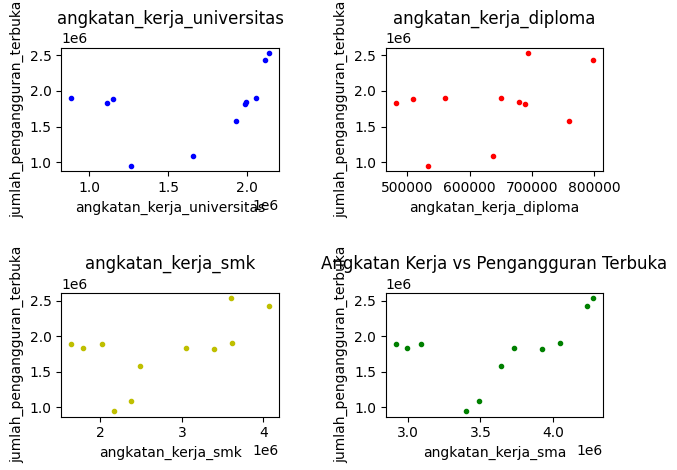

In [257]:
# Plot the data
fig, axes = plt.subplots(2, 2)


axes[0,0].scatter(result['angkatan_kerja_universitas'], result['jumlah_pengangguran_terbuka'], color = "b", marker=".")
axes[0,0].set_title('angkatan_kerja_universitas')
axes[0,0].set(xlabel='angkatan_kerja_universitas',ylabel='jumlah_pengangguran_terbuka')
axes[0,1].scatter(result['angkatan_kerja_diploma'], result['jumlah_pengangguran_terbuka'], color = "r", marker=".")
axes[0,1].set_title('angkatan_kerja_diploma')
axes[0,1].set(xlabel='angkatan_kerja_diploma',ylabel='jumlah_pengangguran_terbuka')
axes[1,0].scatter(result['angkatan_kerja_smk'], result['jumlah_pengangguran_terbuka'], color = "y", marker=".")
axes[1,0].set_title('angkatan_kerja_smk')
axes[1,0].set(xlabel='angkatan_kerja_smk',ylabel='jumlah_pengangguran_terbuka')
axes[1,1].scatter(result['angkatan_kerja_sma'], result['jumlah_pengangguran_terbuka'], color = "g", marker=".")
axes[1,1].set_title('angkatan_kerja_sma')
axes[1,1].set(xlabel='angkatan_kerja_sma',ylabel='jumlah_pengangguran_terbuka')

fig.tight_layout(h_pad=4,w_pad=4)
plt.title("Angkatan Kerja vs Pengangguran Terbuka")
plt.show()

In [258]:
# Create OLS model object
model = smf.ols("jumlah_pengangguran_terbuka ~ angkatan_kerja_smk", result)

# Fit the model
model_pengangguran_angkatankerja_smk = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_pengganguran = print_coef_std_err(model_pengangguran_angkatankerja_smk)

In [259]:
results_pengganguran

,coef,std err
Intercept,927756.668210,451541.607294
angkatan_kerja_smk,0.315708,0.157898


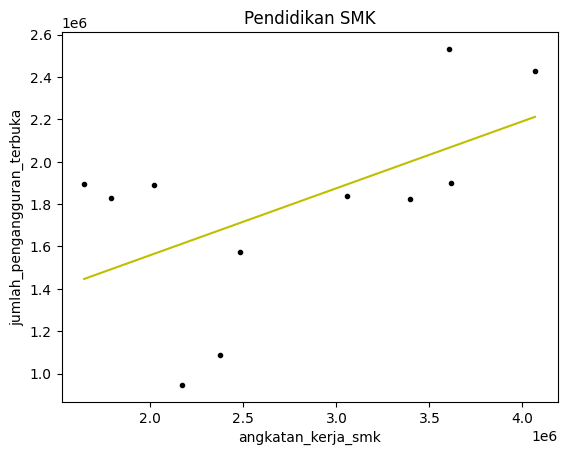

In [260]:
predictor = "angkatan_kerja_smk"
outcome = "jumlah_pengangguran_terbuka"
data = result.copy()
results_ = results_pengganguran.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "y")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Pendidikan SMK")

# Show the plot
plt.show()

In [261]:
# Create OLS model object
model = smf.ols("jumlah_pengangguran_terbuka ~ angkatan_kerja_sma", result)

# Fit the model
model_pengangguran_angkatankerja_sma = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_pengganguran = print_coef_std_err(model_pengangguran_angkatankerja_sma)
results_pengganguran

,coef,std err
Intercept,138426.586885,1.056037e+06
angkatan_kerja_sma,0.458351,2.898495e-01


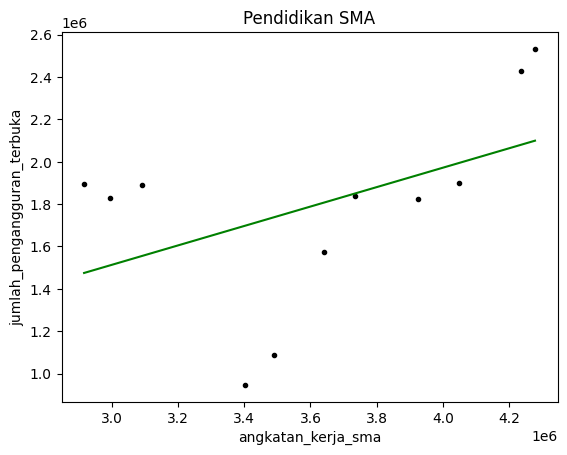

In [262]:
predictor = "angkatan_kerja_sma"
outcome = "jumlah_pengangguran_terbuka"
data = result.copy()
results_ = results_pengganguran.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "g")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Pendidikan SMA")

# Show the plot
plt.show()

In [263]:
# Create OLS model object
model = smf.ols("jumlah_pengangguran_terbuka ~ angkatan_kerja_diploma", result)

# Fit the model
model_pengangguran_angkatankerja_diploma = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_pengganguran = print_coef_std_err(model_pengangguran_angkatankerja_diploma)
results_pengganguran

,coef,std err
Intercept,688105.824431,913891.201992
angkatan_kerja_diploma,1.740968,1.420530


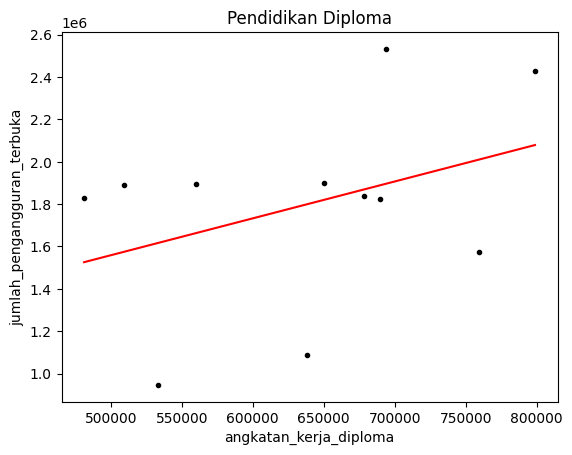

In [264]:
predictor = "angkatan_kerja_diploma"
outcome = "jumlah_pengangguran_terbuka"
data = result.copy()
results_ = results_pengganguran.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "r")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Pendidikan Diploma")

# Show the plot
plt.show()

In [265]:
# Create OLS model object
model = smf.ols("jumlah_pengangguran_terbuka ~ angkatan_kerja_universitas", result)

# Fit the model
model_pengangguran_angkatankerja_universitas = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_pengganguran = print_coef_std_err(model_pengangguran_angkatankerja_universitas)
results_pengganguran

,coef,std err
Intercept,1.158172e+06,537594.243326
angkatan_kerja_universitas,3.833819e-01,0.312536


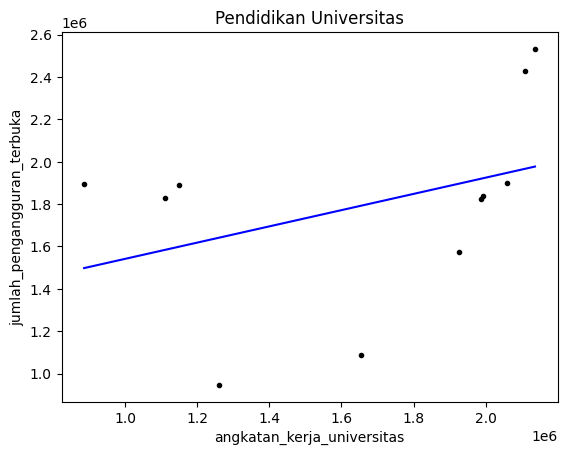

In [266]:
predictor = "angkatan_kerja_universitas"
outcome = "jumlah_pengangguran_terbuka"
data = result.copy()
results_ = results_pengganguran.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Pendidikan Universitas")

# Show the plot
plt.show()

In [267]:
model_pengangguran_angkatankerja_universitas.rsquared

0.14324447602692614

In [268]:
model_pengangguran_angkatankerja_diploma.rsquared

0.1430235216214083

In [269]:
model_pengangguran_angkatankerja_sma.rsquared

0.21743504707290373

In [270]:
model_pengangguran_angkatankerja_smk.rsquared

0.3075720721286379